<a href="https://colab.research.google.com/github/Noctua28/Machine-Learning-Classification/blob/main/Spanish_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Source: 

### [Spanish Wine Quality](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset?resource=download) by Fedesoriano from Kaggle


## Data Description: 

### The dataset consists of information related to red variants of Spanish wines. It includes 11 features describing the wines, such as winery name, wine name, harvest year, average rating given by users, number of reviews, country of origin (Spain), region, price in euros, wine variety, body score (richness and weight of the wine), and acidity score (tartness and refreshing factor). 

# Regression or Classification?

This will be treated as a regression problem. 

Regression aims to predict a continuous numerical value, which is suitable for predicting the wine quality ratings.

## Target:

### The target variable of this dataset is the quality of the wine. 

## Type of problem?

## Loading Dataset:

In [12]:
# Loading dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Science Boot Camp/Machine Learning Introduction/W3 - Classification Models/wines_SPA.csv')
print(df.head())

          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  


In [13]:
# How many features does it have? 
num_features = df.shape[1]
print("Number of Features", num_features)

Number of Features 11


In [14]:
# How many rows are in the dataset?
num_rows = df.shape[0]
print("Number of rows", num_rows)

Number of rows 7500


## Identifying Potential Challenges with the data & addressing them

Missing Values:
winery       0
wine         0
year         2
rating       0
region       0
price        0
type       106
body       271
acidity    271
dtype: int64


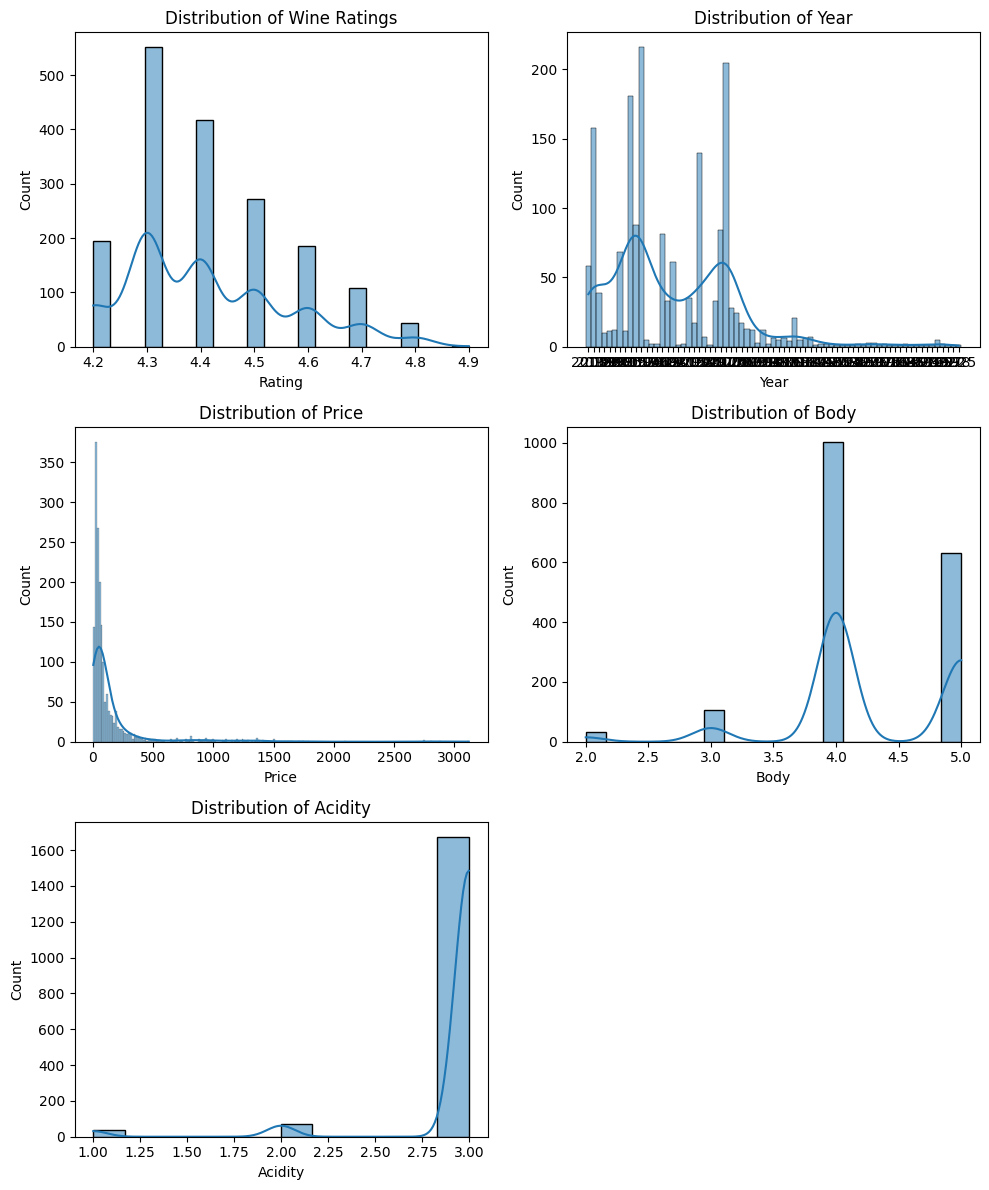

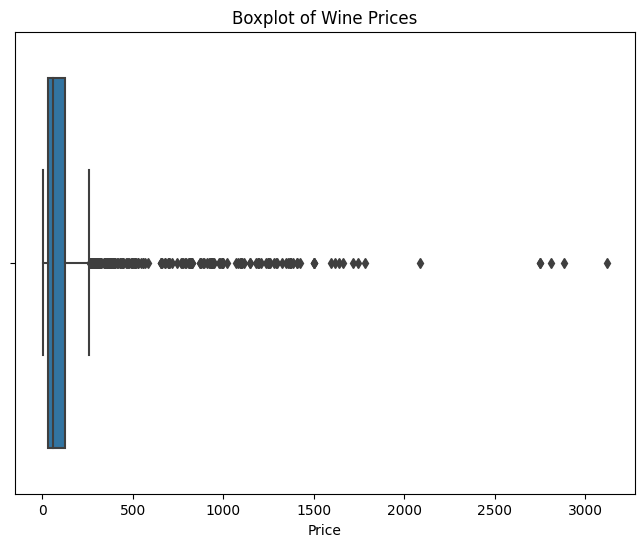

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Deleting unnecessary columns
columns_to_drop = ['num_reviews', 'country']  # Specify columns to drop
df = df.drop(columns_to_drop, axis=1)

# Deleting duplicate rows
df = df.drop_duplicates()

# Identifying and addressing missing values
print("Missing Values:")
print(df.isnull().sum())  # Check for missing values

# Drop rows with missing values
df = df.dropna()

# Identifying and correcting inconsistencies in categorical values
df['type'] = df['type'].str.lower()  # Convert 'type' column to lowercase

# Univariate visuals for the target and features
plt.figure(figsize=(10, 12))  # Adjust the figure size based on the number of features

# Target variable (rating)
plt.subplot(3, 2, 1)  # Update the subplot arrangement
sns.histplot(df['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Wine Ratings')

# Features
features = ['year', 'price', 'body', 'acidity']
for i, feature in enumerate(features, start=2):
    plt.subplot(3, 2, i)  # Update the subplot arrangement
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature.capitalize()}')

plt.tight_layout()
plt.show()

# Identifying outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Boxplot of Wine Prices')
plt.show()

# Removing outliers based on a threshold (e.g., 3 standard deviations)
z_scores = (df['price'] - df['price'].mean()) / df['price'].std()
df = df[abs(z_scores) < 3]

# Commented steps:
# - Unnecessary columns 'num_reviews' and 'country' were dropped as they were not needed for the analysis.
# - Duplicate rows were dropped to ensure data integrity.
# - Missing values were identified using the `isnull().sum()` method, and rows with missing values were dropped using `dropna()`.
# - Inconsistencies in the 'type' column were addressed by converting all values to lowercase.
# - Univariate histograms were plotted to visualize the distribution of the target variable ('rating') and other features.
# - Outliers in the 'price' column were identified and removed based on a threshold of 3 standard deviations.
